[Tabular Playground Series - Feb 2021](https://www.kaggle.com/c/tabular-playground-series-feb-2021/data?select=train.csv)に取り組む。

## ライブラリのインポート、データの読み込み

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.model_selection import KFold

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
# カテゴリデータcat0~9, cont0~13からなる
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


## データの観察

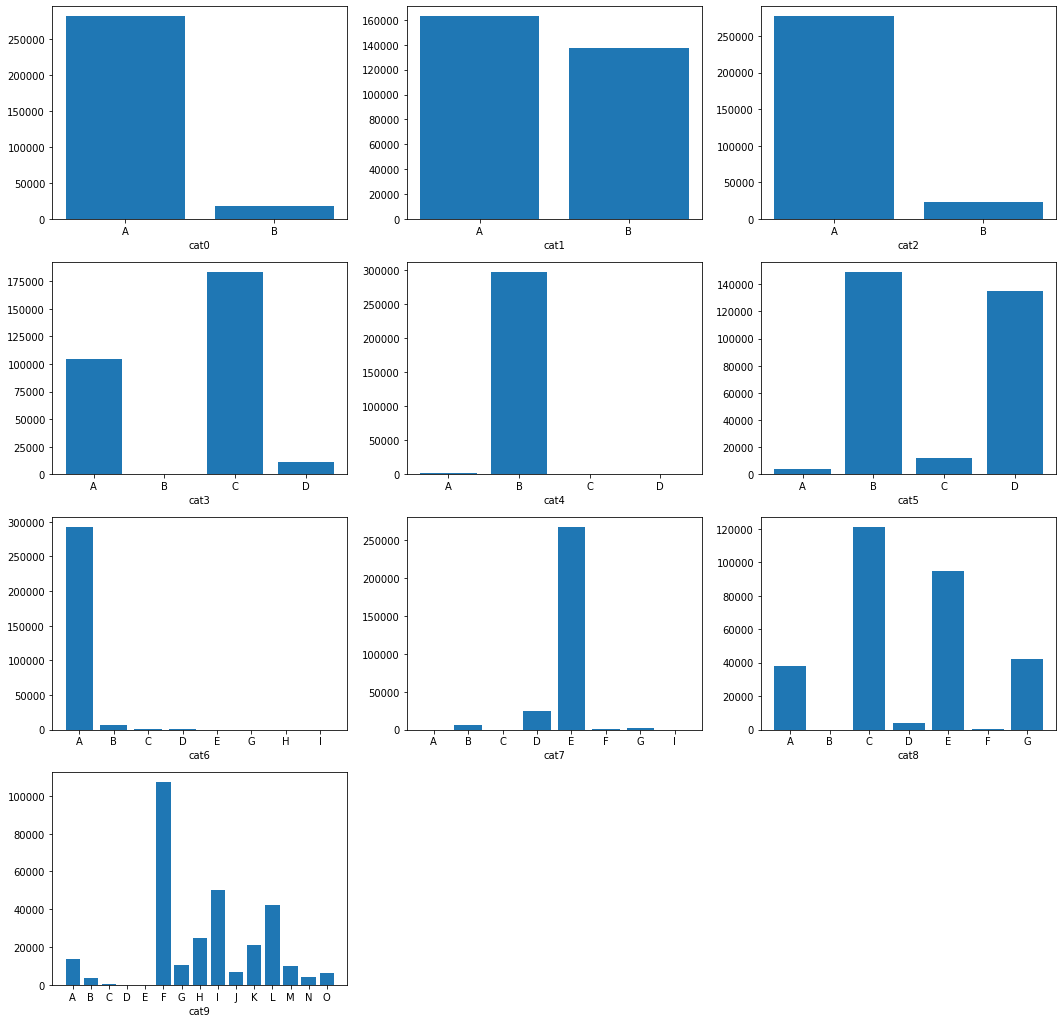

In [4]:
# カテゴリデータの観察
fig = plt.figure(figsize = (18,18))

for i in range(1,11):
    ax = fig.add_subplot(4,3,i)
    ax.bar(x = sorted(train.iloc[:,i].unique().tolist()),
           height = train.iloc[:,i].value_counts().sort_index())
    ax.set_xlabel(''.join(['cat', str(i-1)]))

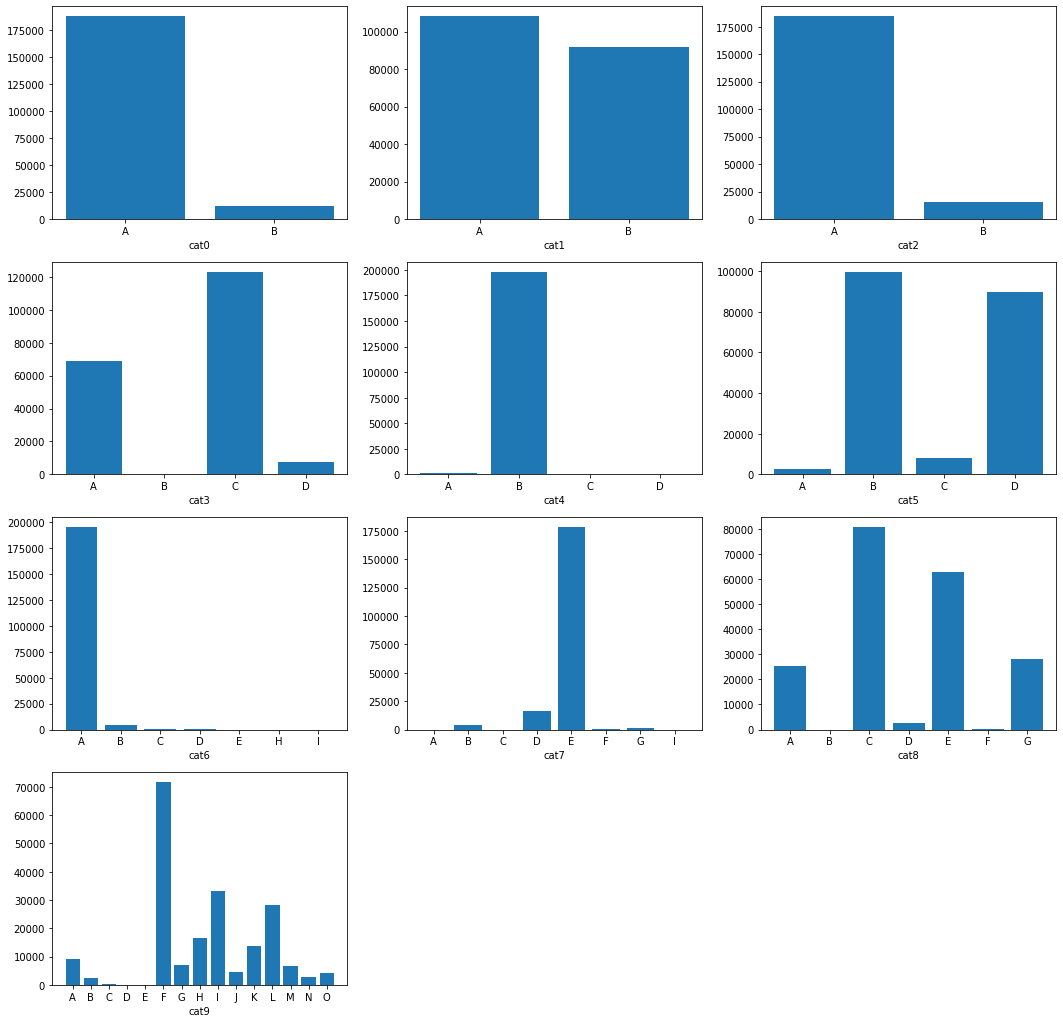

In [43]:
fig = plt.figure(figsize = (18,18))

for i in range(1,11):
    ax = fig.add_subplot(4,3,i)
    ax.bar(x = sorted(test.iloc[:,i].unique().tolist()),
           height = test.iloc[:,i].value_counts().sort_index())
    ax.set_xlabel(''.join(['cat', str(i-1)]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'target')

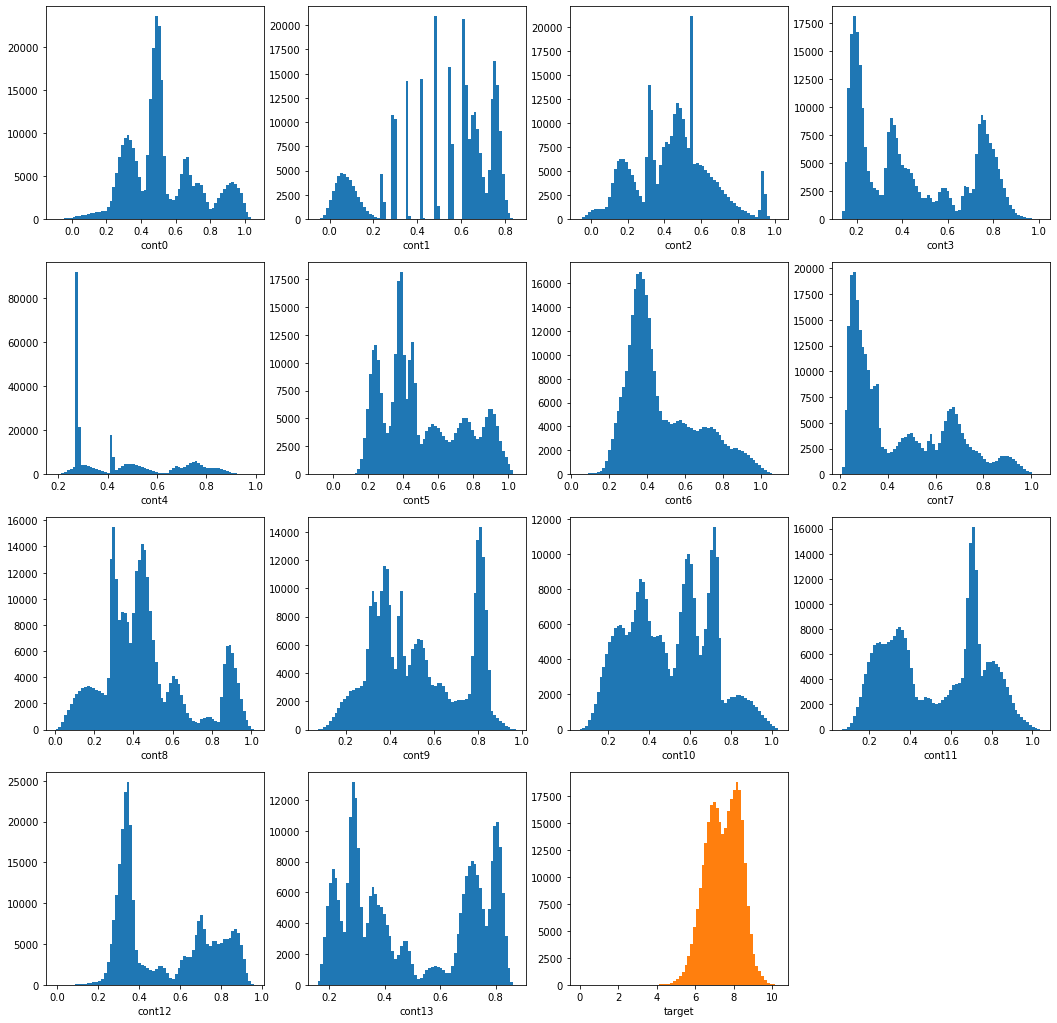

In [5]:
# 数値データの観察。数値データは先月のやつと一緒。
fig = plt.figure(figsize = (18,18))
n_bins = 70

for i in range(11, 26):
    ax = fig.add_subplot(4,4,i - 10)
    ax.hist(train.iloc[:,i], n_bins)
    ax.set_xlabel(''.join(['cont', str(i-11)]))

ax = fig.add_subplot(4,4,15)
ax.hist(train['target'], n_bins)
ax.set_xlabel('target')

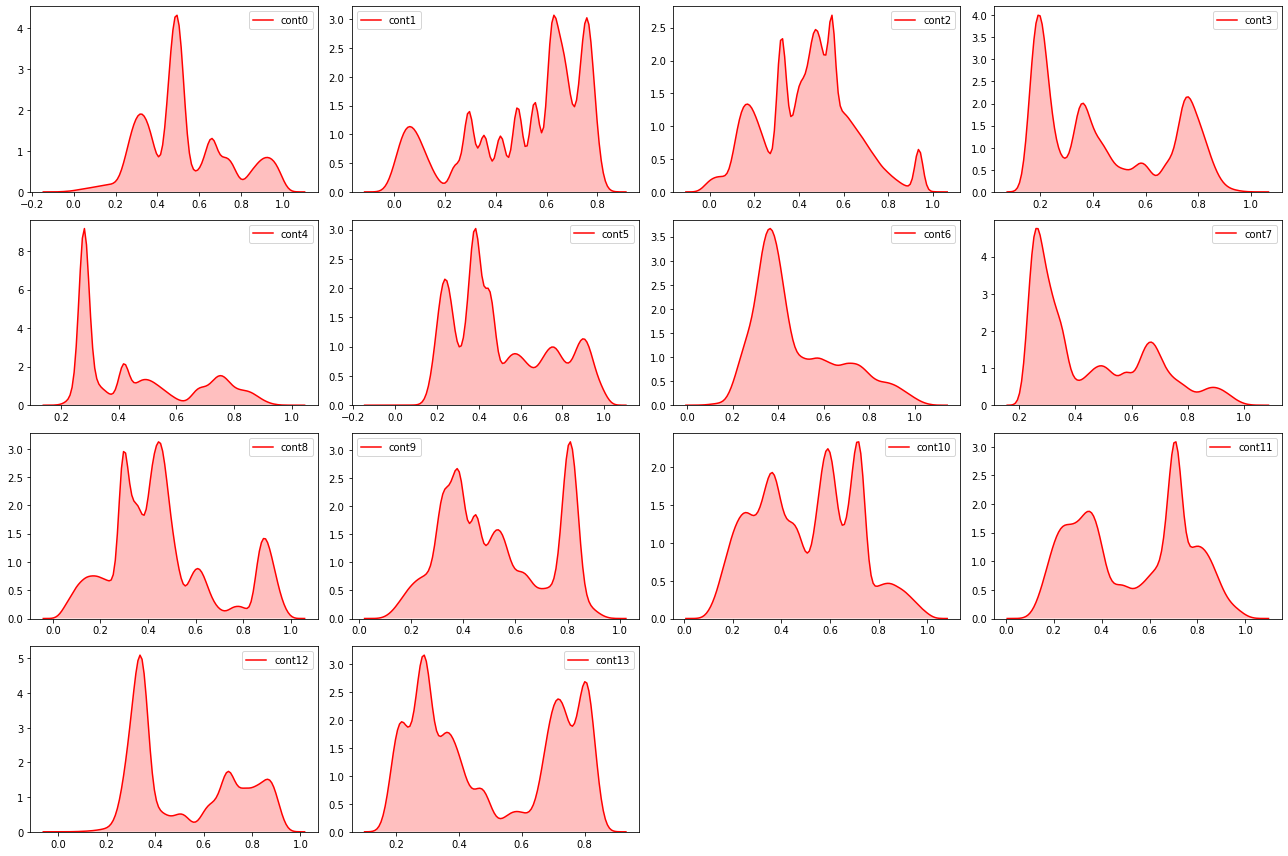

In [6]:
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
sns.kdeplot(train.iloc[:,11], shade=True,ax=ax[0,0],color='red')
sns.kdeplot(train.iloc[:,12], shade=True,ax=ax[0,1],color='red')
sns.kdeplot(train.iloc[:,13], shade=True,ax=ax[0,2],color='red')
sns.kdeplot(train.iloc[:,14], shade=True,ax=ax[0,3],color='red')

sns.kdeplot(train.iloc[:,15], shade=True,ax=ax[1,0],color='red')
sns.kdeplot(train.iloc[:,16], shade=True,ax=ax[1,1],color='red')
sns.kdeplot(train.iloc[:,17], shade=True,ax=ax[1,2],color='red')
sns.kdeplot(train.iloc[:,18], shade=True,ax=ax[1,3],color='red')

sns.kdeplot(train.iloc[:,19], shade=True,ax=ax[2,0],color='red')
sns.kdeplot(train.iloc[:,20], shade=True,ax=ax[2,1],color='red')
sns.kdeplot(train.iloc[:,21], shade=True,ax=ax[2,2],color='red')
sns.kdeplot(train.iloc[:,22], shade=True,ax=ax[2,3],color='red')

sns.kdeplot(train.iloc[:,23], shade=True,ax=ax[3,0],color='red')
sns.kdeplot(train.iloc[:,24], shade=True,ax=ax[3,1],color='red')


f.delaxes(ax[3, 2]) # 3,2は使わないので削除
f.delaxes(ax[3, 3])
plt.tight_layout()
plt.show()

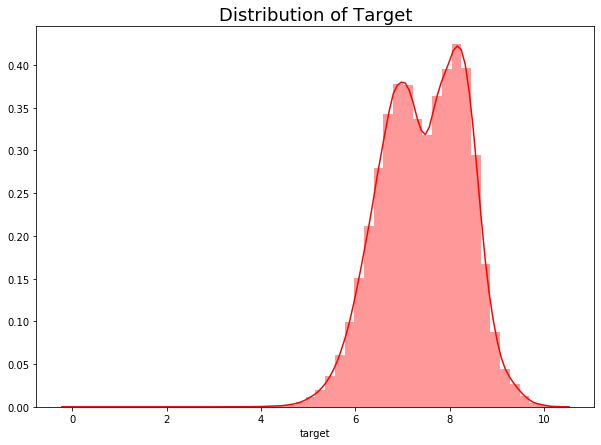

In [7]:
plt.figure(figsize=(10,7))
sns.distplot(train['target'], color= "Red" )
plt.title('Distribution of Target', fontsize=18)
plt.show()

## 前処理

[ここ](https://yolo-kiyoshi.com/2018/12/23/post-1016/)にカテゴリデータの取り扱いが書いてあった。

In [12]:
# One-Hot Encoding
train_onehot = pd.get_dummies(train.iloc[:,1:11])
test_onehot = pd.get_dummies(test.iloc[:,1:11])
train_onehot.head()

,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,1,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
test_onehot['cat6_G'] = [0] * len(test_onehot)
test_onehot = test_onehot[sorted(test_onehot.columns)]
test_onehot.head()

,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,1,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# 正規化
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

train_normarized = mean_norm(train.iloc[:,12:-1])
test_normarized = mean_norm(test.iloc[:,12:])
train_normarized.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0.757937,-1.597599,-0.956671,-0.867237,1.609525,-0.294622,1.396181,1.978224,1.350625,1.088936,0.744942,1.598380,0.961531
1,-2.093072,-0.433192,1.675595,-0.862589,-0.295001,-0.686556,-0.867558,0.607738,0.093896,0.537384,0.915495,-0.895780,1.354758
2,1.077374,0.052623,1.536757,-0.805775,1.752145,-0.565101,1.841925,1.841442,1.462332,-1.194942,0.717419,1.559964,1.443060
3,1.126493,-1.451255,1.201158,1.566124,1.838422,0.522702,-0.237620,1.852681,1.311126,-0.052959,0.728525,1.291354,0.494709
4,0.564032,0.260373,-0.385590,-0.878777,-0.542877,1.182727,-0.639197,-0.083184,-0.317378,1.089087,0.663324,-0.819826,-0.912920


In [50]:
test_normarized.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0.193601,0.215046,-1.213298,1.232346,0.374401,-0.994506,-0.860730,-1.163260,-1.395595,-1.090815,-1.148477,0.588230,-0.893446
1,0.476147,-0.733646,-1.081839,-0.886442,-0.126063,-0.419977,0.102652,1.801934,-0.051854,0.278802,0.873542,-0.931245,1.032460
2,0.478616,1.590176,-1.029761,-0.876312,0.723512,1.128296,-0.990745,0.578708,0.106022,1.634625,1.000383,-0.862879,-1.020163
3,-0.077521,1.364417,-1.059355,0.122620,1.083814,-1.238110,-0.771708,-0.075417,0.342588,-0.452871,-1.187188,0.295481,-0.852703
4,1.051392,-0.641409,-1.063854,1.512881,-1.288459,-0.771301,0.787397,-1.307068,-1.294566,1.015235,-1.323092,-1.079183,1.292974


In [51]:
train_preprocessed = pd.concat([train_onehot, train_normarized], axis = 1)
test_preprocessed = pd.concat([test_onehot, test_normarized], axis = 1)
train_preprocessed['target'] = train['target']
train_preprocessed.head()

,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0,0,1,1,0,1,0,0,0,...,1.609525,-0.294622,1.396181,1.978224,1.350625,1.088936,0.744942,1.598380,0.961531,6.994023
1,0,1,1,0,1,0,1,0,0,0,...,-0.295001,-0.686556,-0.867558,0.607738,0.093896,0.537384,0.915495,-0.895780,1.354758,8.071256
2,1,0,1,0,1,0,0,0,1,0,...,1.752145,-0.565101,1.841925,1.841442,1.462332,-1.194942,0.717419,1.559964,1.443060,5.760456
3,1,0,1,0,1,0,0,0,1,0,...,1.838422,0.522702,-0.237620,1.852681,1.311126,-0.052959,0.728525,1.291354,0.494709,7.806457
4,1,0,0,1,1,0,1,0,0,0,...,-0.542877,1.182727,-0.639197,-0.083184,-0.317378,1.089087,0.663324,-0.819826,-0.912920,6.868974


In [52]:
test_preprocessed.head()

,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1,0,0,1,1,0,0,0,1,0,...,1.232346,0.374401,-0.994506,-0.860730,-1.163260,-1.395595,-1.090815,-1.148477,0.588230,-0.893446
1,1,0,0,1,1,0,0,0,1,0,...,-0.886442,-0.126063,-0.419977,0.102652,1.801934,-0.051854,0.278802,0.873542,-0.931245,1.032460
2,1,0,0,1,1,0,0,0,1,0,...,-0.876312,0.723512,1.128296,-0.990745,0.578708,0.106022,1.634625,1.000383,-0.862879,-1.020163
3,1,0,1,0,0,1,1,0,0,0,...,0.122620,1.083814,-1.238110,-0.771708,-0.075417,0.342588,-0.452871,-1.187188,0.295481,-0.852703
4,1,0,0,1,1,0,1,0,0,0,...,1.512881,-1.288459,-0.771301,0.787397,-1.307068,-1.294566,1.015235,-1.323092,-1.079183,1.292974


In [61]:
# tensor化

train_X = torch.tensor(train_preprocessed.iloc[:, :-1].values).float()
train_t = torch.tensor(train_preprocessed.iloc[:, -1].values).float()
test_X = torch.tensor(test_preprocessed.iloc[:, :].values).float()

print('train_X : ', train_X.shape)
print('train_t : ', train_t.shape)
print('test_X : ', test_X.shape)

train_X :  torch.Size([300000, 69])
train_t :  torch.Size([300000])
test_X :  torch.Size([200000, 69])


## ネットワークの定義

In [60]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        
        self.fc1 = nn.Linear(69, 96)
        self.fc2 = nn.Linear(96, 192)
        self.fc3 = nn.Linear(192, 96)
        self.fc4 = nn.Linear(96, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 16)
        self.fc7 = nn.Linear(16, 1)
        
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        
        return(x)

## ネットワークの学習

In [77]:
# net = Net()
# optimizer = optim.SGD(net.parameters(), lr = 0.01, weight_decay = 1e-7)
# criterion = nn.MSELoss()
# train_loss_list = []
# valid_loss_list = []
# num_epoch = 100

checkpoint = torch.load('net.tar')
net = Net()
net.load_state_dict(checkpoint['net_state_dict'])
optimizer = optim.SGD(net.parameters(), lr = 0.01, weight_decay = 1e-7)
criterion = nn.MSELoss()
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
num_epoch = checkpoint['num_epoch']
train_loss_list = checkpoint['train_loss_list']
valid_loss_list = checkpoint['valid_loss_list']

kf = KFold(n_splits = 5, shuffle = True)

for epoch in range(num_epoch, num_epoch + 900):
    for i, (train_index, valid_index) in enumerate(kf.split(train_X)):
        # 訓練
        net.train()
        optimizer.zero_grad()
        outputs = net(train_X[train_index]).view(-1)
        loss = criterion(outputs, train_t[train_index])
        loss.backward()
        optimizer.step()
        running_loss = loss.item()
        
        if i == 0:
            train_loss_list.append(running_loss)
            print('epoch: ', epoch + 1, 'train loss: ', running_loss)
            
        # 検証
        net.eval()
        with torch.no_grad():
            outputs = net(train_X[valid_index]).view(-1)
            loss = criterion(outputs, train_t[valid_index])
            running_loss = loss.item()
            if i == 0:
                valid_loss_list.append(running_loss)
                print('epoch: ', epoch + 1, 'valid loss: ', running_loss)

epoch:  101 train loss:  0.7654705047607422
epoch:  101 valid loss:  0.7670176029205322
epoch:  102 train loss:  0.7644743323326111
epoch:  102 valid loss:  0.7701964974403381
epoch:  103 train loss:  0.7650669813156128
epoch:  103 valid loss:  0.7670440077781677
epoch:  104 train loss:  0.765260636806488
epoch:  104 valid loss:  0.7654699683189392
epoch:  105 train loss:  0.7643347382545471
epoch:  105 valid loss:  0.7683866024017334
epoch:  106 train loss:  0.7647952437400818
epoch:  106 valid loss:  0.7657442092895508
epoch:  107 train loss:  0.7656817436218262
epoch:  107 valid loss:  0.761430025100708
epoch:  108 train loss:  0.7639932036399841
epoch:  108 valid loss:  0.7674044966697693
epoch:  109 train loss:  0.7638734579086304
epoch:  109 valid loss:  0.7671239972114563
epoch:  110 train loss:  0.763949453830719
epoch:  110 valid loss:  0.7660669684410095
epoch:  111 train loss:  0.763805627822876
epoch:  111 valid loss:  0.7659096121788025
epoch:  112 train loss:  0.763232469

epoch:  194 valid loss:  0.7497640252113342
epoch:  195 train loss:  0.7555084824562073
epoch:  195 valid loss:  0.7538959383964539
epoch:  196 train loss:  0.7544710040092468
epoch:  196 valid loss:  0.7576642632484436
epoch:  197 train loss:  0.7549663782119751
epoch:  197 valid loss:  0.7553189992904663
epoch:  198 train loss:  0.7558878660202026
epoch:  198 valid loss:  0.751274049282074
epoch:  199 train loss:  0.7557064294815063
epoch:  199 valid loss:  0.7516292333602905
epoch:  200 train loss:  0.755238950252533
epoch:  200 valid loss:  0.7531414031982422
epoch:  201 train loss:  0.7550960779190063
epoch:  201 valid loss:  0.7533649802207947
epoch:  202 train loss:  0.754530131816864
epoch:  202 valid loss:  0.7553107142448425
epoch:  203 train loss:  0.754504382610321
epoch:  203 valid loss:  0.7550240755081177
epoch:  204 train loss:  0.7545782923698425
epoch:  204 valid loss:  0.7543858289718628
epoch:  205 train loss:  0.7543091177940369
epoch:  205 valid loss:  0.755131065

epoch:  288 train loss:  0.7503060102462769
epoch:  288 valid loss:  0.7510852217674255
epoch:  289 train loss:  0.7500585913658142
epoch:  289 valid loss:  0.751958966255188
epoch:  290 train loss:  0.7509890794754028
epoch:  290 valid loss:  0.748028576374054
epoch:  291 train loss:  0.7499854564666748
epoch:  291 valid loss:  0.7519101500511169
epoch:  292 train loss:  0.750551164150238
epoch:  292 valid loss:  0.7494671940803528
epoch:  293 train loss:  0.7502899169921875
epoch:  293 valid loss:  0.7503722906112671
epoch:  294 train loss:  0.7510486841201782
epoch:  294 valid loss:  0.7471591830253601
epoch:  295 train loss:  0.7491037845611572
epoch:  295 valid loss:  0.7547829151153564
epoch:  296 train loss:  0.7501557469367981
epoch:  296 valid loss:  0.7504204511642456
epoch:  297 train loss:  0.7494645714759827
epoch:  297 valid loss:  0.7530352473258972
epoch:  298 train loss:  0.7495558857917786
epoch:  298 valid loss:  0.752522349357605
epoch:  299 train loss:  0.751349508

epoch:  381 valid loss:  0.7469660043716431
epoch:  382 train loss:  0.7477602362632751
epoch:  382 valid loss:  0.7505455017089844
epoch:  383 train loss:  0.7482405304908752
epoch:  383 valid loss:  0.7485390901565552
epoch:  384 train loss:  0.7468221783638
epoch:  384 valid loss:  0.7541369199752808
epoch:  385 train loss:  0.7471643090248108
epoch:  385 valid loss:  0.7526867389678955
epoch:  386 train loss:  0.7487128376960754
epoch:  386 valid loss:  0.7464146614074707
epoch:  387 train loss:  0.7471244931221008
epoch:  387 valid loss:  0.7526848912239075
epoch:  388 train loss:  0.7488012313842773
epoch:  388 valid loss:  0.7459102869033813
epoch:  389 train loss:  0.7485074400901794
epoch:  389 valid loss:  0.747002363204956
epoch:  390 train loss:  0.7472806572914124
epoch:  390 valid loss:  0.7518300414085388
epoch:  391 train loss:  0.7483733892440796
epoch:  391 valid loss:  0.7473875880241394
epoch:  392 train loss:  0.7485707402229309
epoch:  392 valid loss:  0.746519148

epoch:  475 train loss:  0.7478118538856506
epoch:  475 valid loss:  0.7444798946380615
epoch:  476 train loss:  0.7476744055747986
epoch:  476 valid loss:  0.7449666857719421
epoch:  477 train loss:  0.7468906044960022
epoch:  477 valid loss:  0.748053252696991
epoch:  478 train loss:  0.7472254633903503
epoch:  478 valid loss:  0.7466599345207214
epoch:  479 train loss:  0.7463319897651672
epoch:  479 valid loss:  0.7501847743988037
epoch:  480 train loss:  0.7453586459159851
epoch:  480 valid loss:  0.7540779709815979
epoch:  481 train loss:  0.7478872537612915
epoch:  481 valid loss:  0.7438642978668213
epoch:  482 train loss:  0.7467300295829773
epoch:  482 valid loss:  0.7484427690505981
epoch:  483 train loss:  0.7465770244598389
epoch:  483 valid loss:  0.7490072846412659
epoch:  484 train loss:  0.7456040382385254
epoch:  484 valid loss:  0.7528519630432129
epoch:  485 train loss:  0.745870053768158
epoch:  485 valid loss:  0.7517356276512146
epoch:  486 train loss:  0.7478907

epoch:  568 valid loss:  0.74404376745224
epoch:  569 train loss:  0.746147632598877
epoch:  569 valid loss:  0.7469727993011475
epoch:  570 train loss:  0.7465543746948242
epoch:  570 valid loss:  0.7453089952468872
epoch:  571 train loss:  0.7453777194023132
epoch:  571 valid loss:  0.7499758005142212
epoch:  572 train loss:  0.7453380823135376
epoch:  572 valid loss:  0.7501229643821716
epoch:  573 train loss:  0.7450697422027588
epoch:  573 valid loss:  0.751129686832428
epoch:  574 train loss:  0.7477041482925415
epoch:  574 valid loss:  0.7405560612678528
epoch:  575 train loss:  0.7452722191810608
epoch:  575 valid loss:  0.7502450346946716
epoch:  576 train loss:  0.7447226643562317
epoch:  576 valid loss:  0.7524095177650452
epoch:  577 train loss:  0.7457779049873352
epoch:  577 valid loss:  0.7481458187103271
epoch:  578 train loss:  0.7447319626808167
epoch:  578 valid loss:  0.7522934079170227
epoch:  579 train loss:  0.74619060754776
epoch:  579 valid loss:  0.74643230438

epoch:  662 train loss:  0.74472975730896
epoch:  662 valid loss:  0.7494167685508728
epoch:  663 train loss:  0.7457579374313354
epoch:  663 valid loss:  0.7452661395072937
epoch:  664 train loss:  0.7456716299057007
epoch:  664 valid loss:  0.7455894351005554
epoch:  665 train loss:  0.745452344417572
epoch:  665 valid loss:  0.7464348077774048
epoch:  666 train loss:  0.7437474131584167
epoch:  666 valid loss:  0.7532156705856323
epoch:  667 train loss:  0.7461198568344116
epoch:  667 valid loss:  0.7436969876289368
epoch:  668 train loss:  0.7436256408691406
epoch:  668 valid loss:  0.7536501288414001
epoch:  669 train loss:  0.745497465133667
epoch:  669 valid loss:  0.7461263537406921
epoch:  670 train loss:  0.7467612028121948
epoch:  670 valid loss:  0.7410397529602051
epoch:  671 train loss:  0.745547354221344
epoch:  671 valid loss:  0.7458872199058533
epoch:  672 train loss:  0.7461348176002502
epoch:  672 valid loss:  0.7434808611869812
epoch:  673 train loss:  0.7472230195

epoch:  755 valid loss:  0.7419021129608154
epoch:  756 train loss:  0.7444323301315308
epoch:  756 valid loss:  0.7478687763214111
epoch:  757 train loss:  0.7453290224075317
epoch:  757 valid loss:  0.7442540526390076
epoch:  758 train loss:  0.7448543906211853
epoch:  758 valid loss:  0.7461445331573486
epoch:  759 train loss:  0.7457133531570435
epoch:  759 valid loss:  0.7427076697349548
epoch:  760 train loss:  0.7423046231269836
epoch:  760 valid loss:  0.7562709450721741
epoch:  761 train loss:  0.7452419400215149
epoch:  761 valid loss:  0.7444961667060852
epoch:  762 train loss:  0.7442010045051575
epoch:  762 valid loss:  0.748629093170166
epoch:  763 train loss:  0.7449379563331604
epoch:  763 valid loss:  0.7456560134887695
epoch:  764 train loss:  0.7452960014343262
epoch:  764 valid loss:  0.7442032694816589
epoch:  765 train loss:  0.7456226348876953
epoch:  765 valid loss:  0.7428799867630005
epoch:  766 train loss:  0.7456574440002441
epoch:  766 valid loss:  0.742698

epoch:  849 train loss:  0.7446710467338562
epoch:  849 valid loss:  0.7445598244667053
epoch:  850 train loss:  0.7455043196678162
epoch:  850 valid loss:  0.7411736845970154
epoch:  851 train loss:  0.7453641891479492
epoch:  851 valid loss:  0.7417161464691162
epoch:  852 train loss:  0.746003270149231
epoch:  852 valid loss:  0.7391471862792969
epoch:  853 train loss:  0.7454817295074463
epoch:  853 valid loss:  0.7411895394325256
epoch:  854 train loss:  0.7445167303085327
epoch:  854 valid loss:  0.7450445890426636
epoch:  855 train loss:  0.745063841342926
epoch:  855 valid loss:  0.7428118586540222
epoch:  856 train loss:  0.743772566318512
epoch:  856 valid loss:  0.747954249382019
epoch:  857 train loss:  0.7460593581199646
epoch:  857 valid loss:  0.7388088703155518
epoch:  858 train loss:  0.7452014684677124
epoch:  858 valid loss:  0.7422017455101013
epoch:  859 train loss:  0.7448630928993225
epoch:  859 valid loss:  0.7435182929039001
epoch:  860 train loss:  0.744305431

epoch:  943 train loss:  0.7440769672393799
epoch:  943 valid loss:  0.7447404265403748
epoch:  944 train loss:  0.7450323104858398
epoch:  944 valid loss:  0.7409263253211975
epoch:  945 train loss:  0.7441622614860535
epoch:  945 valid loss:  0.7443781495094299
epoch:  946 train loss:  0.7444503307342529
epoch:  946 valid loss:  0.7431902885437012
epoch:  947 train loss:  0.7448798418045044
epoch:  947 valid loss:  0.7414411306381226
epoch:  948 train loss:  0.7439433336257935
epoch:  948 valid loss:  0.7451649904251099
epoch:  949 train loss:  0.7448139786720276
epoch:  949 valid loss:  0.7416741251945496
epoch:  950 train loss:  0.7446194291114807
epoch:  950 valid loss:  0.7424206137657166
epoch:  951 train loss:  0.7445205450057983
epoch:  951 valid loss:  0.7428125739097595
epoch:  952 train loss:  0.7449151277542114
epoch:  952 valid loss:  0.7411940097808838
epoch:  953 train loss:  0.7447461485862732
epoch:  953 valid loss:  0.7418485283851624
epoch:  954 train loss:  0.74329

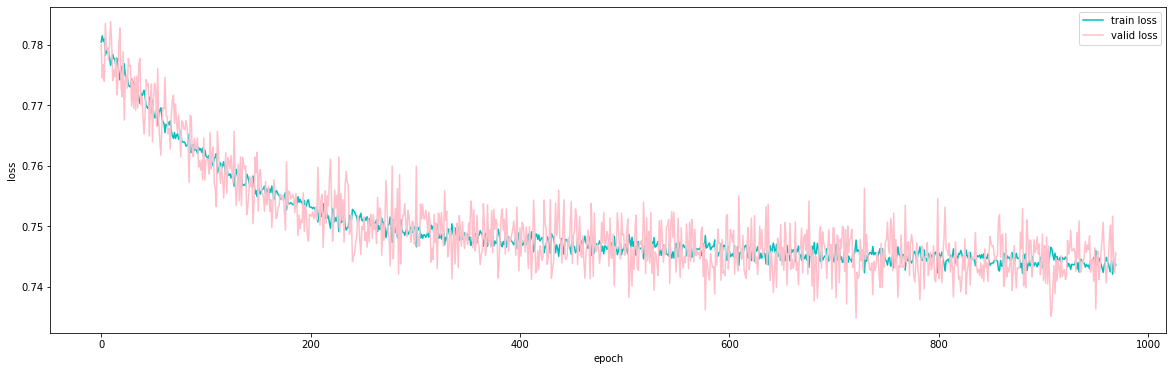

In [78]:
plt.figure(figsize = (20,6))
plt.plot(train_loss_list[30:], color = 'c', label = 'train loss')
plt.plot(valid_loss_list[30:], color = 'pink', label = 'valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()

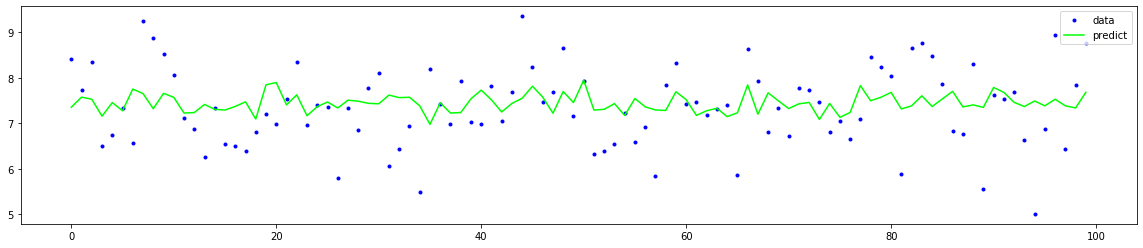

In [79]:
net.eval()
with torch.no_grad():
    y = net(valid_X)
    
plt.figure(figsize = (20,4))
plt.plot(valid_t.detach().numpy().ravel()[:100], 
         marker = '.', linestyle = 'None', color = 'blue', label = 'data')
plt.plot(y.detach().numpy().ravel()[:100], linestyle = '-', color = 'lime', label = 'predict')
plt.legend(loc = 'upper right')
plt.show()

In [80]:
num_epoch = 1000
torch.save(
    {
        'num_epoch': num_epoch,
        'net_state_dict': net.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss_list': train_loss_list,
        'valid_loss_list': valid_loss_list
    },
    'net.tar',
)

## 提出

In [81]:
net.eval()
with torch.no_grad():
    prediction = net(test_X)
pd.DataFrame(pd.Series(prediction.detach().numpy().ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,200000.0,7.457596,0.20583,6.696884,7.322186,7.445982,7.58489,8.510379


In [82]:
submission = pd.DataFrame({'id': test['id'], 'target': prediction.detach().numpy().ravel()})
submission.head()

,id,target
0,0,7.473568
1,5,7.869937
2,15,7.690345
3,16,7.479819
4,17,7.258981


In [83]:
submission.tail()

,id,target
199995,499987,7.274997
199996,499990,7.435157
199997,499991,7.491292
199998,499994,7.518399
199999,499995,7.259801


In [84]:
submission.to_csv("submission3.csv", index = False)